In [ ]:
# Basic data + plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Text + NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt_tab')

# ML / metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# For BERT embeddings
!pip install -q transformers
from transformers import AutoTokenizer, AutoModel
import torch

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
review_path = "/content/drive/MyDrive/Colab Notebooks/review.json"
review_df = pd.read_json(
    review_path,
    lines=True,
    nrows=10000
)
business_path = "/content/drive/MyDrive/Colab Notebooks/business.json"
business_df = pd.read_json(
    business_path,
    lines=True,
    nrows=10000
)
user_path = "/content/drive/MyDrive/Colab Notebooks/user.json"
user_df = pd.read_json(
    user_path,
    lines=True,
    nrows=10000
)

In [ ]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
review_df = review_df[['review_id', 'user_id', 'business_id',
                       'stars', 'useful', 'funny', 'cool',
                       'text', 'date']]

business_df = business_df[['business_id', 'name', 'city', 'state',
                           'categories', 'stars']]
user_df = user_df[['user_id', 'review_count', 'average_stars', 'fans']]

In [ ]:
# Join business info (city, categories, business stars)
reviews_full = review_df.merge(
    business_df,
    on='business_id',
    how='left',
    suffixes=('_review', '_business')
)

# Join user info (user stats)
reviews_full = reviews_full.merge(
    user_df,
    on='user_id',
    how='left'
)

In [ ]:
reviews_full.head()

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,name,city,state,categories,stars_business,review_count,average_stars,fans,helpful
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,North Wales,PA,"Restaurants, Breakfast & Brunch, Food, Juice B...",3.0,NaN,NaN,NaN,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,Philadelphia,PA,"Halal, Pakistani, Restaurants, Indian",4.0,NaN,NaN,NaN,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,New Orleans,LA,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",4.0,NaN,NaN,NaN,1


In [ ]:
# Target: helpfulness
reviews_full['helpful'] = reviews_full['useful']

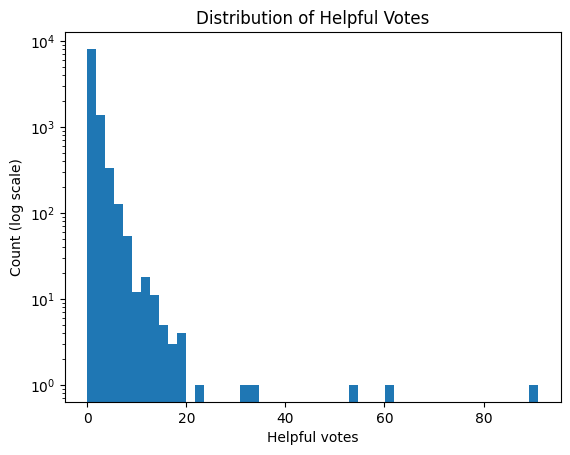

In [ ]:
plt.hist(reviews_full['helpful'], bins=50)
plt.yscale('log')
plt.xlabel('Helpful votes')
plt.ylabel('Count (log scale)')
plt.title('Distribution of Helpful Votes')
plt.show()

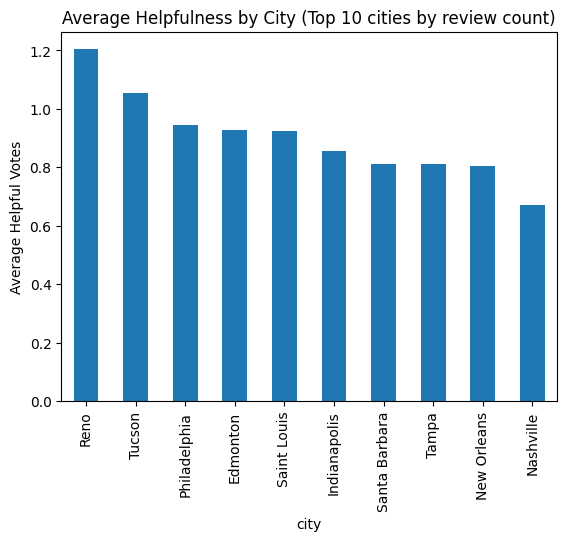

In [ ]:
top_cities = (reviews_full['city']
              .value_counts()
              .head(10)
              .index)

city_group = (reviews_full[reviews_full['city'].isin(top_cities)]
              .groupby('city')['helpful']
              .mean()
              .sort_values(ascending=False))

city_group.plot(kind='bar')
plt.ylabel('Average Helpful Votes')
plt.title('Average Helpfulness by City (Top 10 cities by review count)')
plt.show()

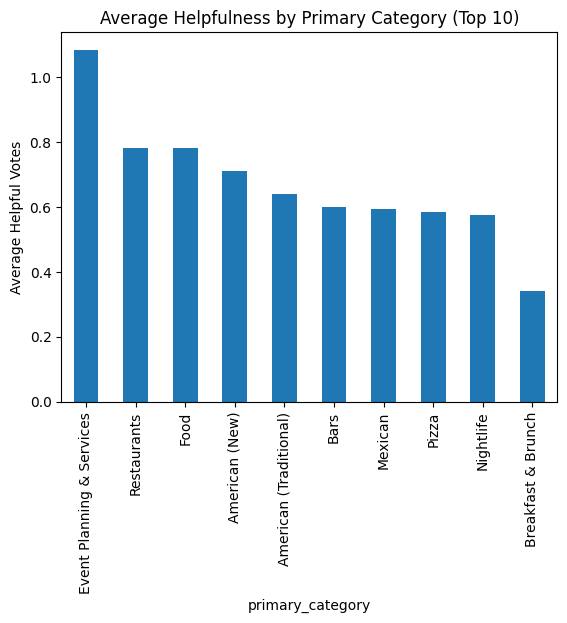

In [ ]:
def extract_primary_category(cat_str):
    if pd.isna(cat_str):
        return None
    return cat_str.split(',')[0].strip()

reviews_full['primary_category'] = reviews_full['categories'].apply(extract_primary_category)

top_cats = (reviews_full['primary_category']
            .value_counts()
            .head(10)
            .index)

cat_group = (reviews_full[reviews_full['primary_category'].isin(top_cats)]
             .groupby('primary_category')['helpful']
             .mean()
             .sort_values(ascending=False))

cat_group.plot(kind='bar')
plt.ylabel('Average Helpful Votes')
plt.title('Average Helpfulness by Primary Category (Top 10)')
plt.show()

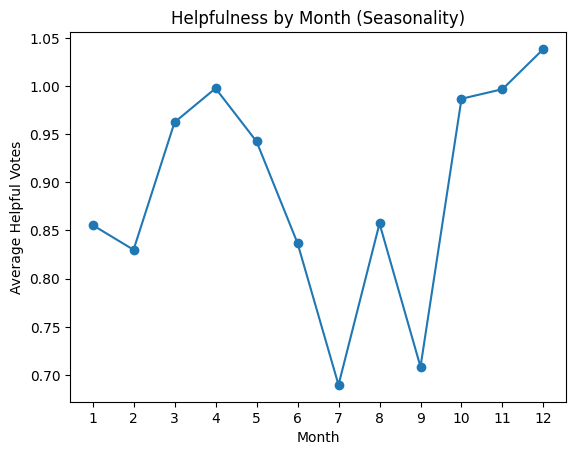

In [ ]:
reviews_full['year'] = reviews_full['date'].dt.year
reviews_full['month'] = reviews_full['date'].dt.month

# Average helpful votes by month
month_group = (reviews_full
               .groupby('month')['helpful']
               .mean())

month_group.plot(kind='line', marker='o')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Average Helpful Votes')
plt.title('Helpfulness by Month (Seasonality)')
plt.show()

Correlation between useful and cool: 0.6367403336740741
Correlation between useful and funny: 0.4264265775164793


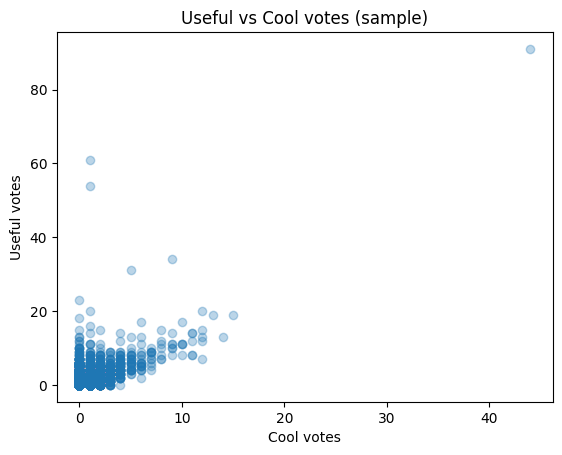

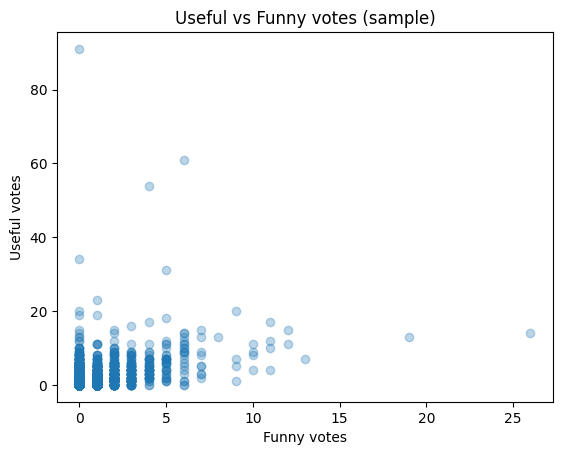

In [ ]:
print("Correlation between useful and cool:",
      reviews_full[['useful', 'cool']].corr().iloc[0,1])

print("Correlation between useful and funny:",
      reviews_full[['useful', 'funny']].corr().iloc[0,1])

# Scatter (use subset for speed)
sample = reviews_full.sample(10000, random_state=42)

plt.scatter(sample['cool'], sample['useful'], alpha=0.3)
plt.xlabel('Cool votes')
plt.ylabel('Useful votes')
plt.title('Useful vs Cool votes (sample)')
plt.show()

plt.scatter(sample['funny'], sample['useful'], alpha=0.3)
plt.xlabel('Funny votes')
plt.ylabel('Useful votes')
plt.title('Useful vs Funny votes (sample)')
plt.show()


In [ ]:
# Character length
reviews_full['len_chars'] = reviews_full['text'].str.len()

# Word count
reviews_full['len_words'] = reviews_full['text'].apply(
    lambda x: len(nltk.word_tokenize(x)) if isinstance(x, str) else 0
)

# Simple EDA: correlation with helpfulness
print(reviews_full[['helpful', 'len_chars', 'len_words']].corr())

            helpful  len_chars  len_words
helpful    1.000000   0.266538   0.265617
len_chars  0.266538   1.000000   0.997601
len_words  0.265617   0.997601   1.000000


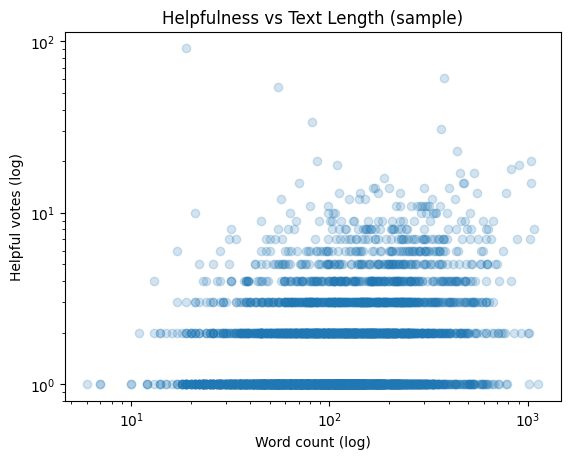

In [ ]:
sample = reviews_full.sample(10000, random_state=42)
plt.scatter(sample['len_words'], sample['helpful'], alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Word count (log)')
plt.ylabel('Helpful votes (log)')
plt.title('Helpfulness vs Text Length (sample)')
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))

def compute_lexical_features(text):
    if not isinstance(text, str) or not text:
        return pd.Series({'lexical_richness': 0,
                          'stopword_ratio': 0})
    tokens = nltk.word_tokenize(text.lower())
    if len(tokens) == 0:
        return pd.Series({'lexical_richness': 0,
                          'stopword_ratio': 0})
    unique_tokens = set(tokens)
    lexical_richness = len(unique_tokens) / len(tokens)
    stop_count = sum(1 for t in tokens if t in stop_words)
    stopword_ratio = stop_count / len(tokens)
    return pd.Series({'lexical_richness': lexical_richness,
                      'stopword_ratio': stopword_ratio})

lex_feats = reviews_full['text'].head(50_000).apply(compute_lexical_features)
reviews_full.loc[lex_feats.index, ['lexical_richness', 'stopword_ratio']] = lex_feats.values
print(reviews_full[['helpful', 'lexical_richness', 'stopword_ratio']].corr())

                   helpful  lexical_richness  stopword_ratio
helpful           1.000000         -0.205192        0.066795
lexical_richness -0.205192          1.000000       -0.380474
stopword_ratio    0.066795         -0.380474        1.000000
